<a href="https://colab.research.google.com/github/sufairahmed/ML_IBM_COURSERA/blob/main/multiple_linear_regression_IBM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center> Multiple Linear Regression</center></h1>

<h4> Importing Libraries</h4>

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

<h4>Import Dataset</h4>

In [69]:
# Reading the data
dataset = pd.read_csv('FuelConsumptionCo2.csv')
#take a look at the dataset
dataset.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [70]:
#Summerize the Dataset
dataset.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


####Select some Feature to Explore more 

In [71]:
selected_data = dataset[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
selected_data.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267
9,2.4,4,10.6,7.5,9.2,212


####Plot Emission values with respect to Engine size

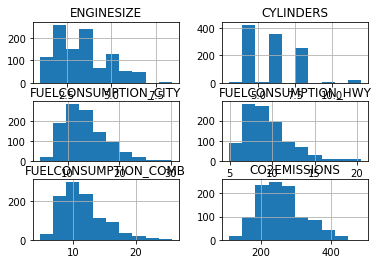

In [72]:
selected_data_viz = selected_data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
selected_data_viz.hist()
plt.show()

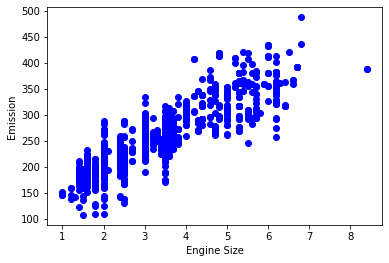

In [73]:
plt.scatter(selected_data.ENGINESIZE, selected_data.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

<h4>Splitting the Dataset into Training and testing dataset</h4>

In [74]:
msk = np.random.rand(len(dataset)) < 0.8
train = selected_data[msk]
test = selected_data[~msk]

<h4>Train Dataset</h4>

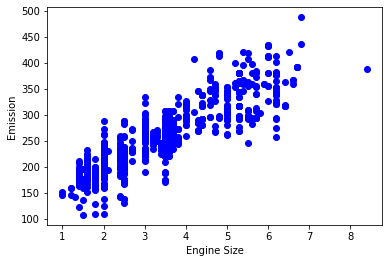

In [75]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS, color = 'blue')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

<h1>Simple Regression Model</h1>

In [76]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regressor.fit(x,y)
#The Coefficients
print('coefficients:', regressor.coef_)


coefficients: [[11.21250906  7.22606925  9.66455211]]


<h2>Prediction the test set Results</h2>

In [77]:
y_hat = regressor.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))

print('Variance score: %.2f' % regressor.score(x,y))

Residual sum of squares: 456.26
Variance score: 0.88


In [78]:
y_hat = regressor.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))

print('Variance score: %.2f' % regressor.score(x,y))

Residual sum of squares: 778.39
Variance score: 0.79


<h1>Multiple Regression Model</h1>

In [79]:
# regressor = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regressor.fit (x, y)
print ('Coefficients: ', regressor.coef_)

y_hat= regressor.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"% np.mean((y_hat- y) ** 2))
print('Variance score: %.2f' % regressor.score(x, y))

Coefficients:  [[11.18648419  7.36950449  4.94514389  4.83605203]]
Residual sum of squares: 459.38
Variance score: 0.88
